Подготова датасета

In [11]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Загрузка датасета
file_path = "phone.csv"  # Укажите имя файла, если он находится в той же папке
dk = pd.read_csv(file_path)
kkkk=['battery_power', 'px_height', 'px_width', 'ram', 'pc', 'price_range', 'int_memory']
df=dk[kkkk]

# Проверка загруженных данных
print(df.head())
print(df.info())


   battery_power  px_height  px_width   ram  pc  price_range  int_memory
0            842         20       756  2549   2            1           7
1           1021        905      1988  2631   6            2          53
2            563       1263      1716  2603   6            2          41
3            615       1216      1786  2769   9            2          10
4           1821       1208      1212  1411  14            1          44
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   px_height      2000 non-null   int64
 2   px_width       2000 non-null   int64
 3   ram            2000 non-null   int64
 4   pc             2000 non-null   int64
 5   price_range    2000 non-null   int64
 6   int_memory     2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
None


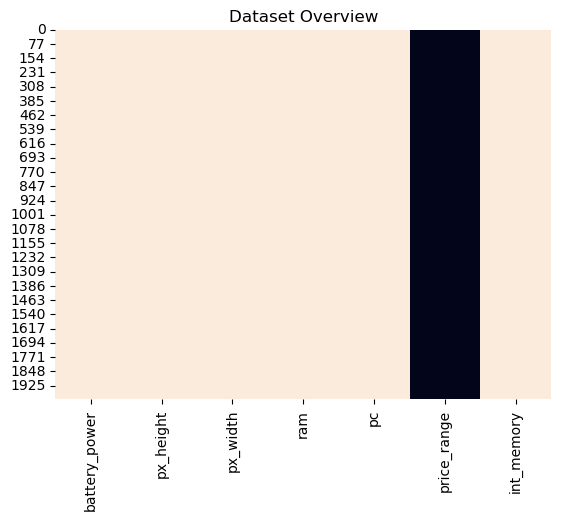

 Categorical   Numeric   NaN 


In [13]:
'''
Определяет, является ли столбец числовым или категориальным.
:параметр
     :param dtf: dataframe - входные данные
     :param col: str - имя столбца для анализа
     :param max_cat: num - максимальное количество уникальных значений для распознавания столбца как категориального
:возвращает
     "cat", если столбец является категориальным или "num" в противном случае


Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

# Формируем словарь dic_cols.
# Ключи - название фич
# Значение - категориальный (cat) или числовой (num)
dic_cols = {col: utils_recognize_type(df, col, max_cat=20) for col in df.columns}

'''
df.isnull() - возвращает датасет, который похож на изначальный датасет df, но в каждой ячейке вместо значений написано:
 False (если значение есть)
 True  (если в ячейке отсутствует значение)
'''
heatmap = df.isnull()

'''
Проходим по столбцам и меняем значения:
 если столбец числовой:
    пишем 0.5, если значение False (то есть оно не нулевое)
    пишем 1,   если значение True

 если столбец категориальный
    пишем 0, если значение False   (то есть оно не нулевое)
    пишем 1,   если значение True

После этого у нас окажется, что значения могут принимать всего три различных значения.
'''
for k, v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

'''
Строим heatmap (тепловую карту)
0.5 - если значение есть и оно числовое
0   - если значение есть и оно категориальное
1   - если значения в ячейке нет
'''
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

'''
Печатаем внизу подобие легенды, раскрашивая так, как нужно.
'''
print("\033[1;37;40m Categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

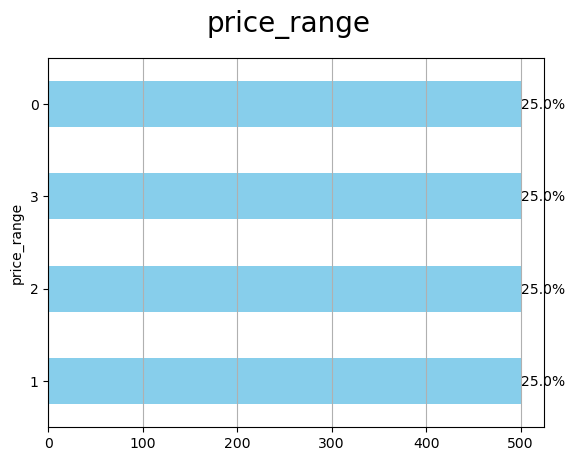

In [15]:
'''
Анализируем, сколько объектов попадает в каждую ценовую категорию (price_range).
Группируем данные по значениям столбца price_range и считаем количество объектов в каждой группе.
'''

# Задаем столбец для группировки
y = "price_range"

'''
Считаем количество объектов с одинаковыми значениями в столбце y: df[y].value_counts()
Потом сортируем полученное sort_values()
И строим горизонтальную гистограмму
'''
ax = df[y].value_counts().sort_values().plot(kind="barh", color="skyblue")

'''
Формируем надписи для графика: добавляем процентные значения рядом с каждой полосой.
'''
totals = []  # список для сохранения общего количества объектов
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)  # общее число объектов

for i in ax.patches:
    # Добавляем текст с процентом
    ax.text(i.get_width() + 0.3, i.get_y() + 0.20,
            str(round((i.get_width() / total) * 100, 2)) + '%',
            fontsize=10, color='black')

# Добавляем сетку и заголовок
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

'''
Отрисовываем график.
'''
plt.show()


C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


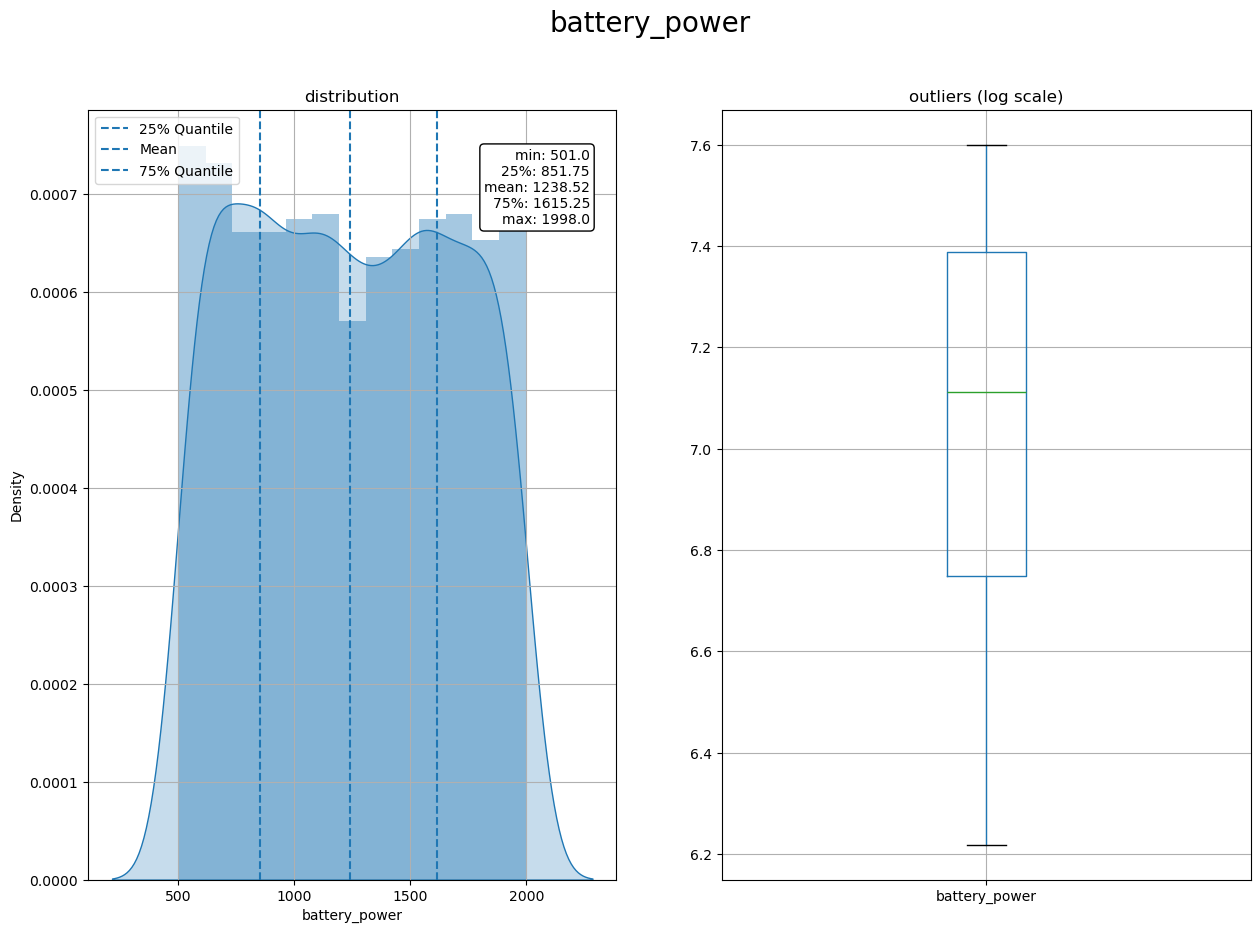

C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


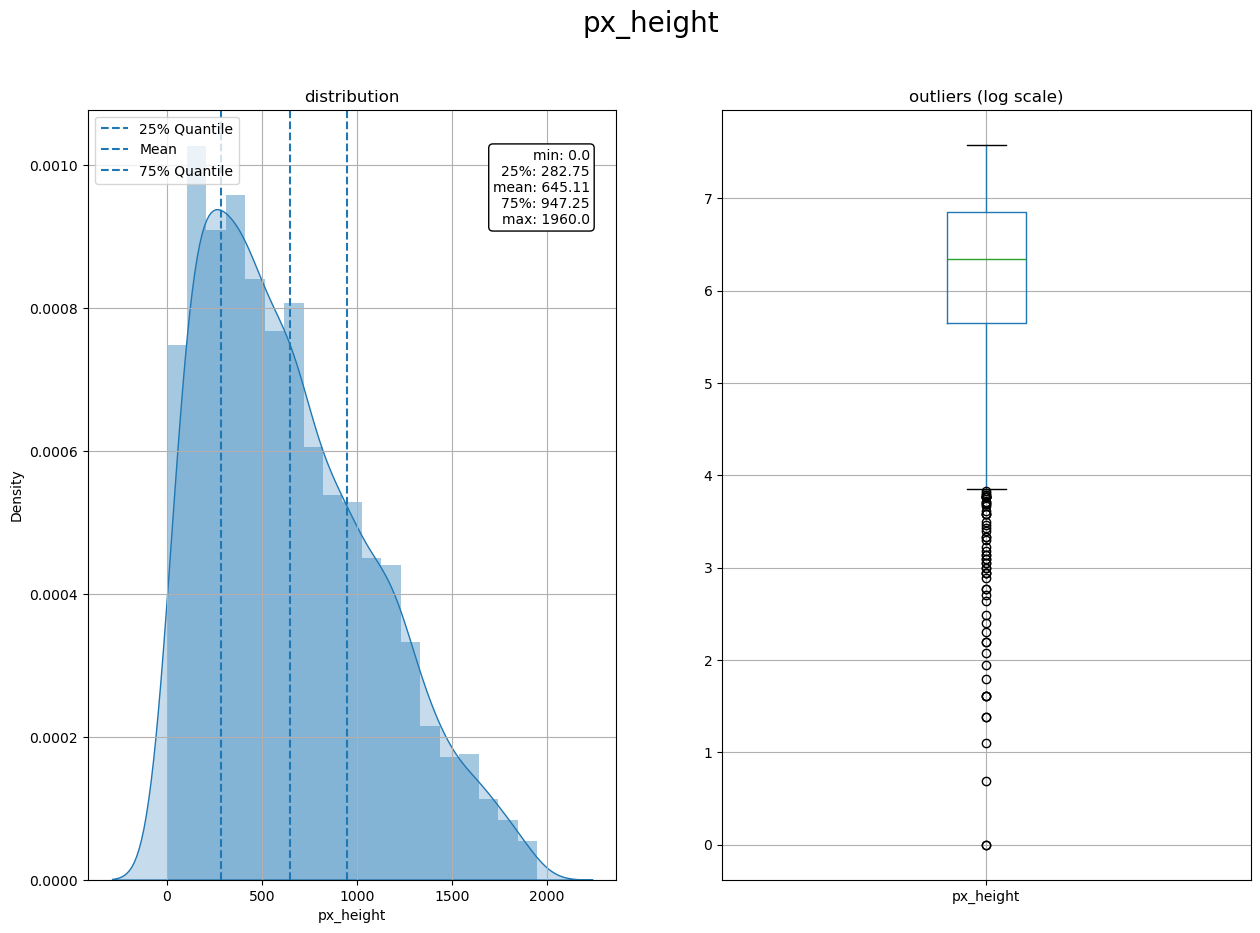

C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


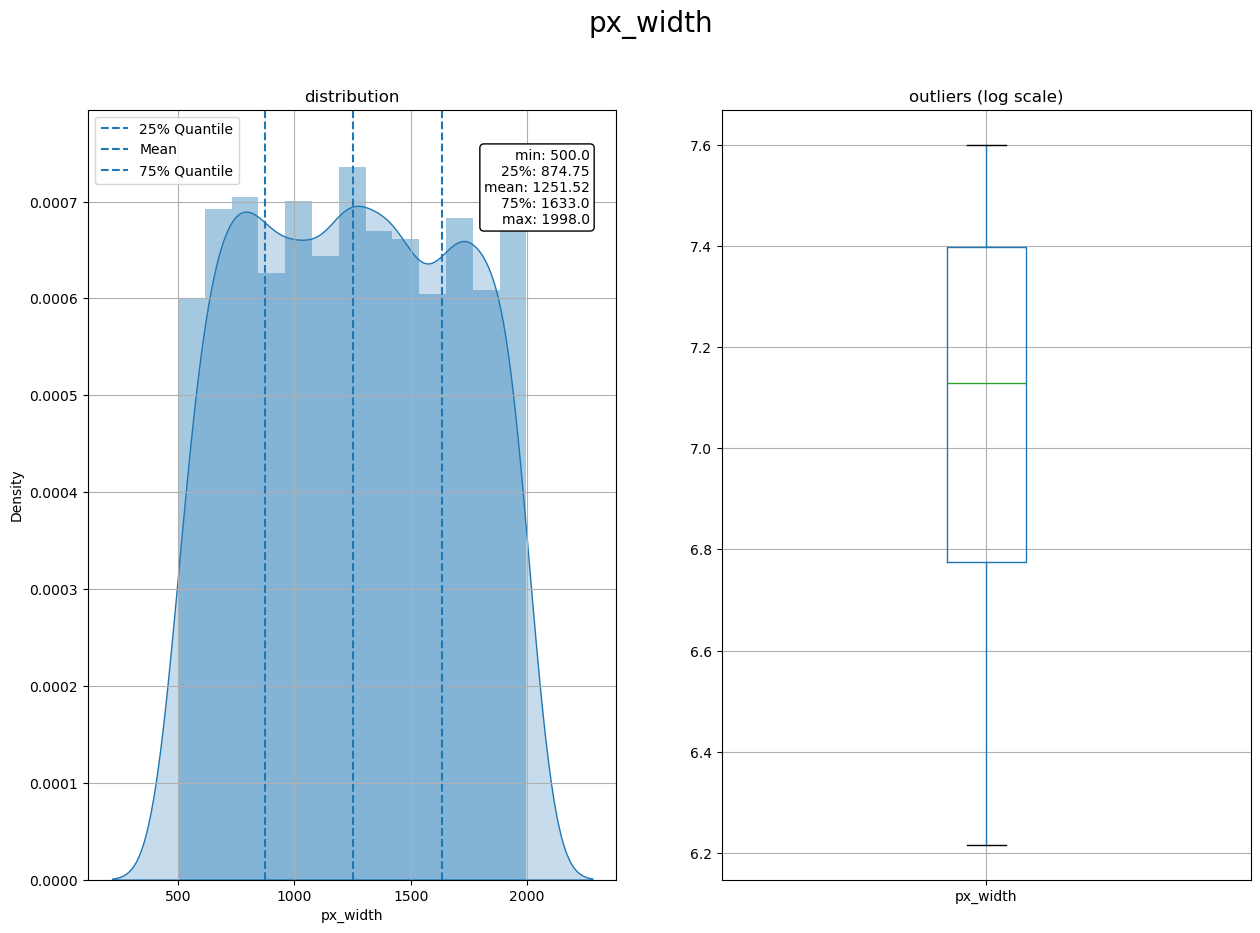

C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


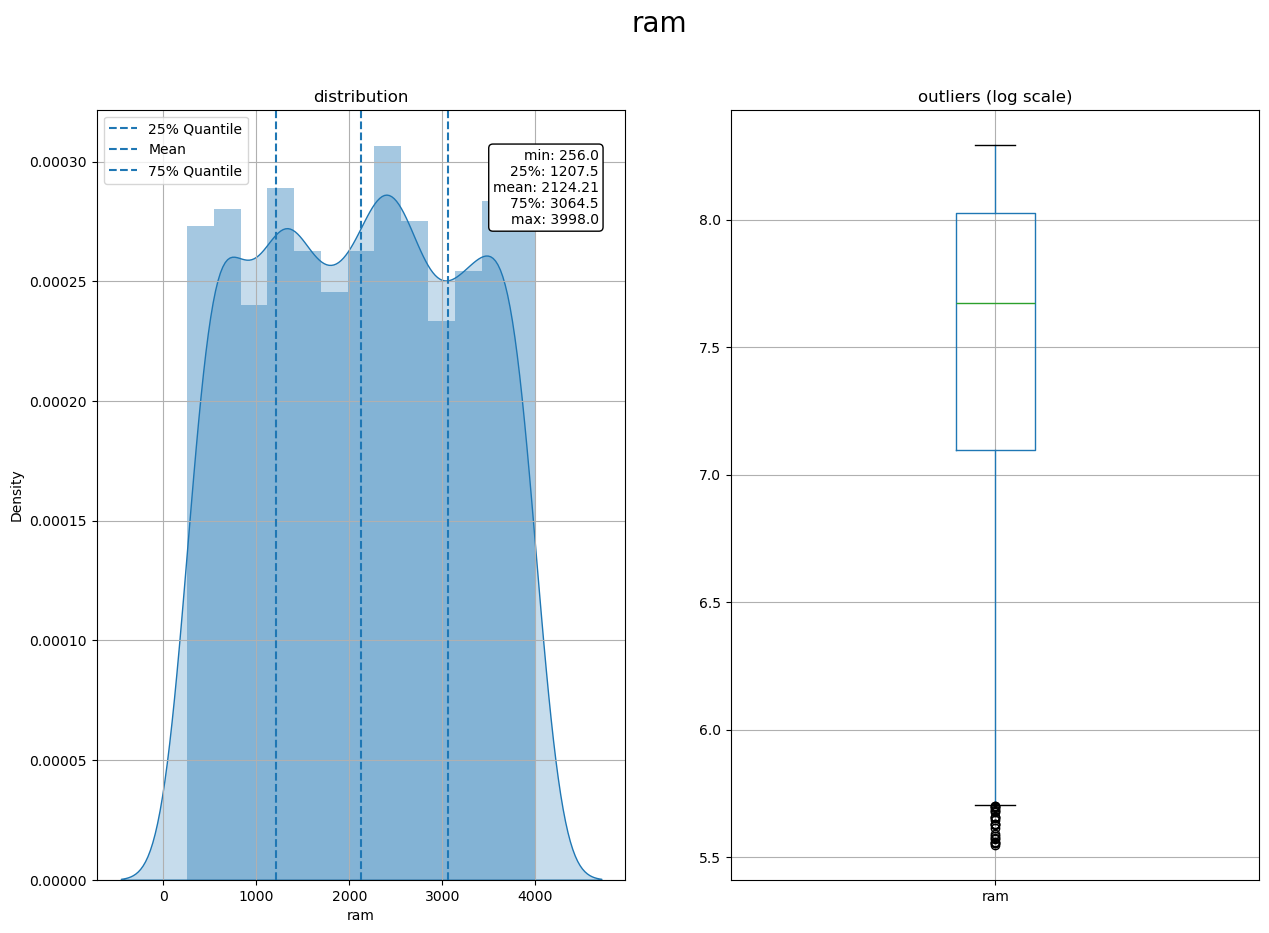

C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


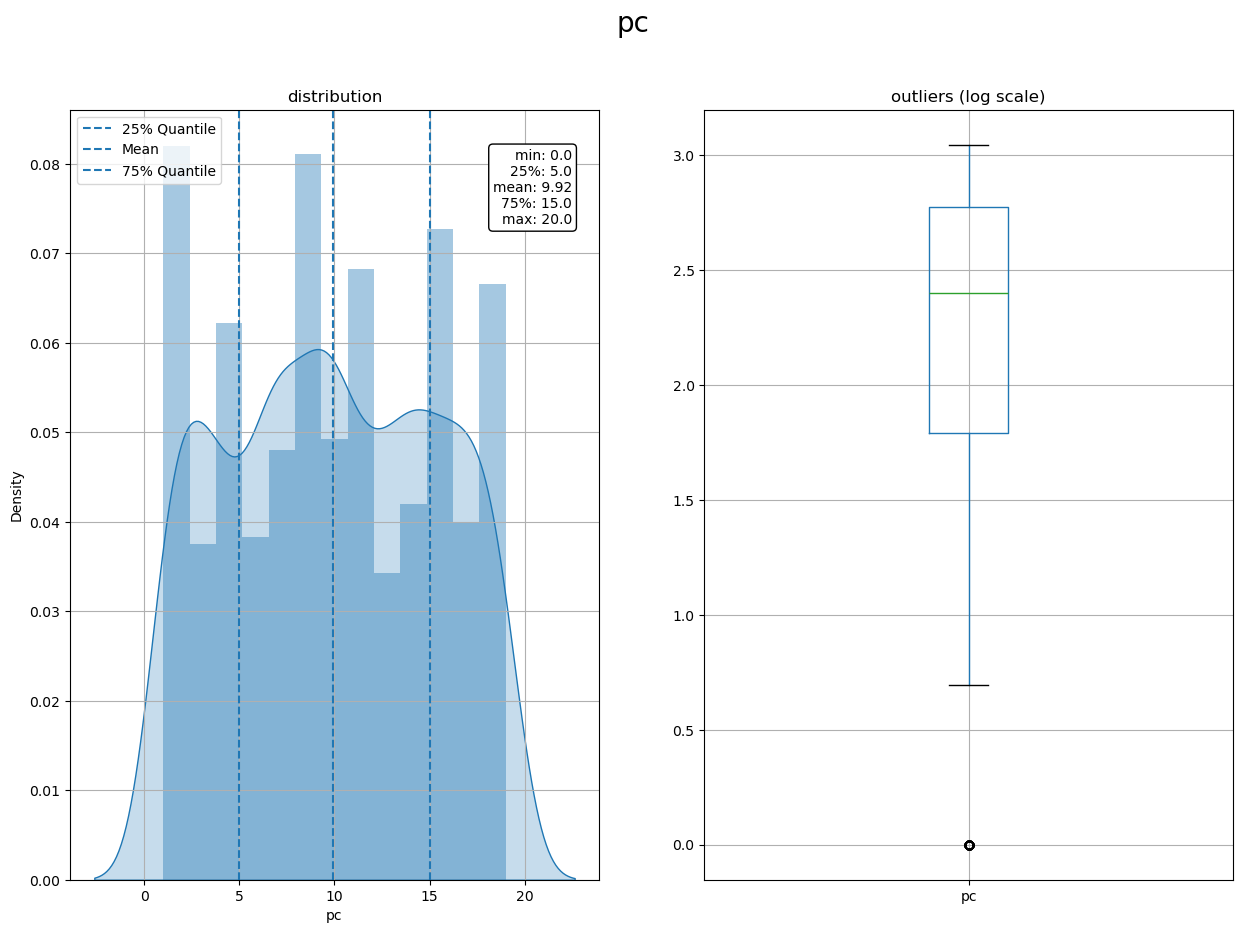

C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


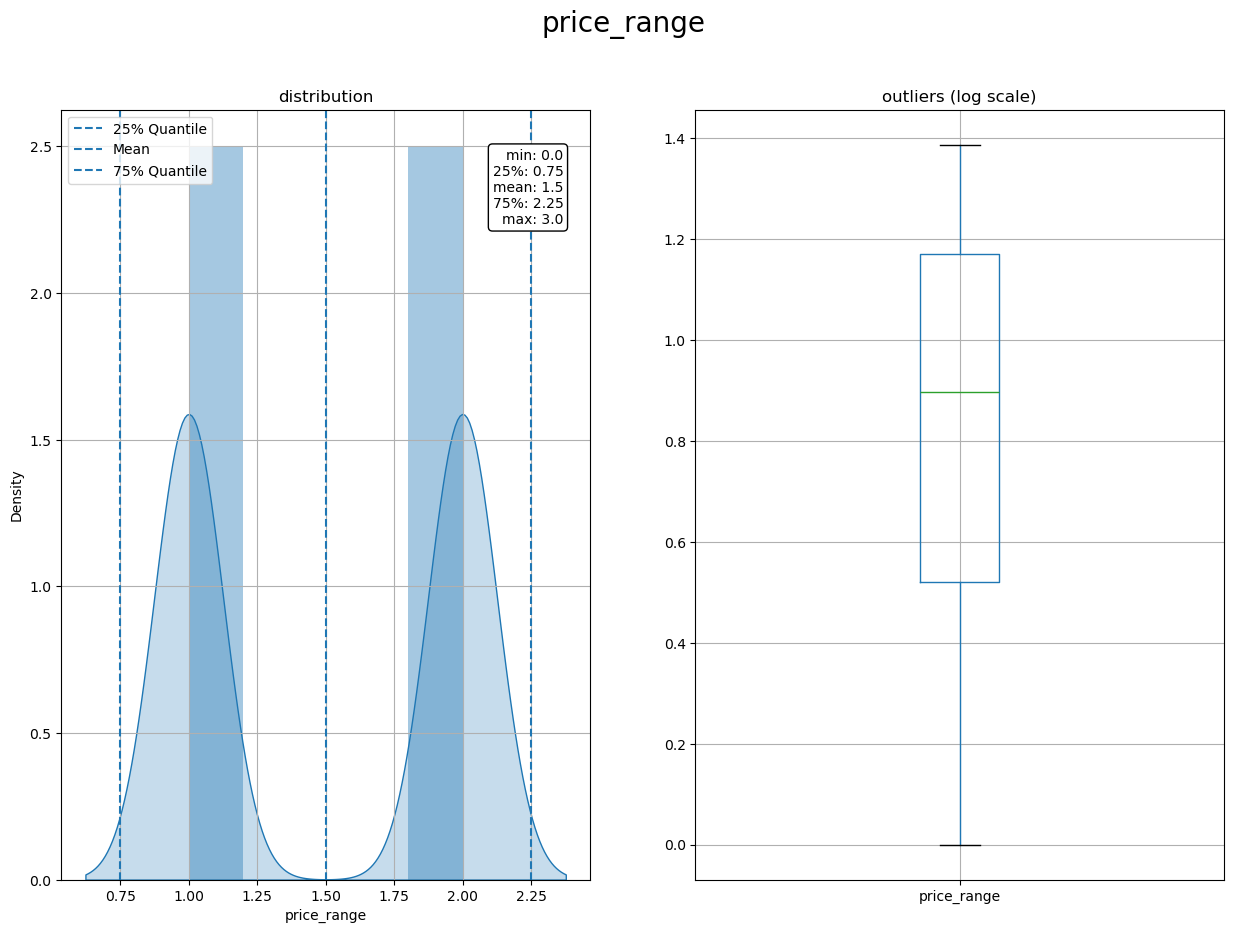

C:\Users\eric1\AppData\Local\Temp\ipykernel_17744\3837131193.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


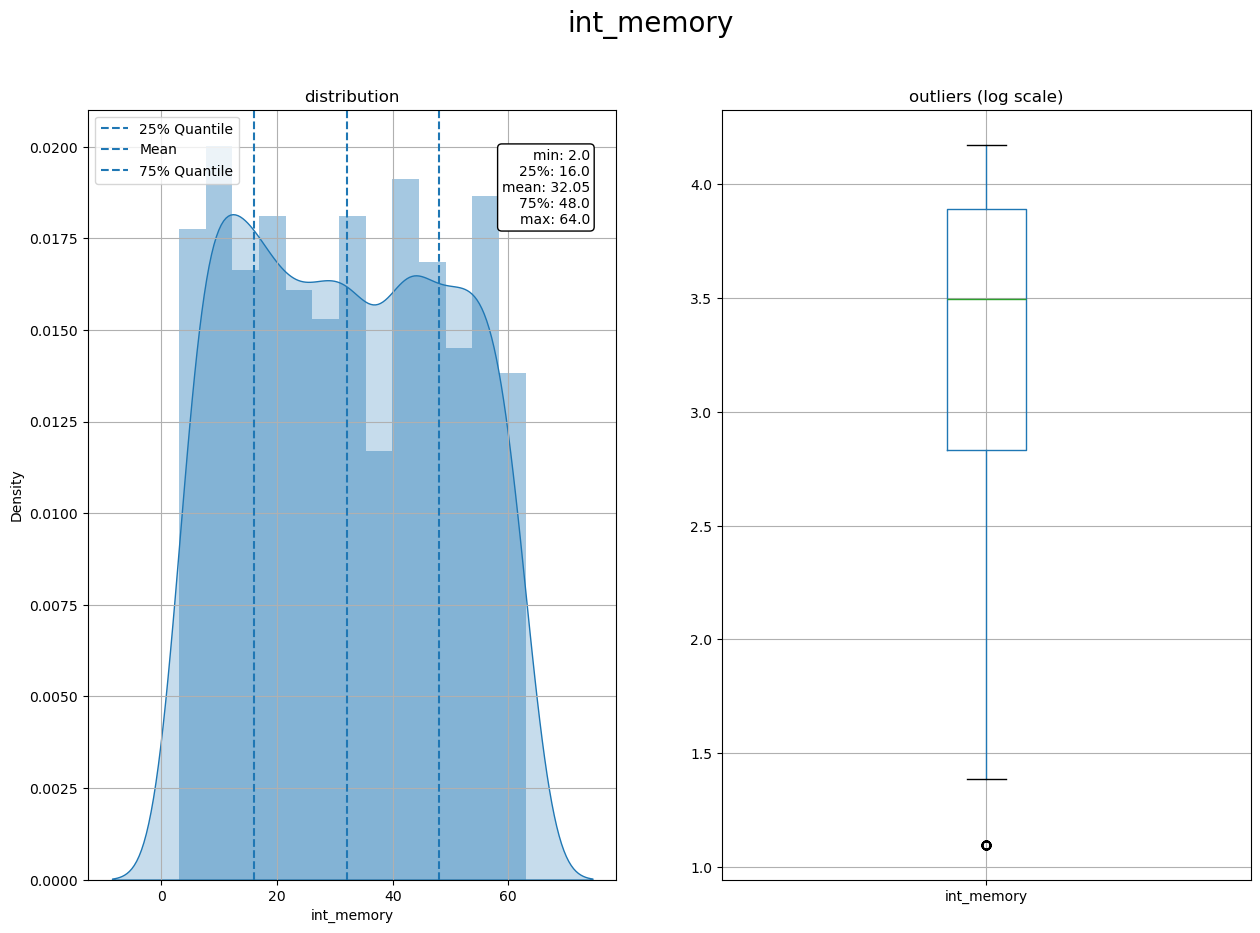

In [17]:
'''
Функция для отображения распределения и выбросов по заданному столбцу.
'''
def show_dist(x, dtf):
    '''
    :param x: название столбца
    :param dtf: датасет
    :return: ничего не возвращает
    '''
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)
    
    ### Распределение
    ax[0].title.set_text('distribution')
    variable = dtf[x].fillna(dtf[x].mean())  # заменяем отсутствующие значения средними
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))  # вычисляем квантили
    variable = variable[(variable > breaks[0]) & (variable < breaks[10])]  # исключаем выбросы
    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # строим график распределения
    
    des = dtf[x].describe()  # статистическое описание столбца
    
    # Добавляем линии для 25%, среднего и 75% значений
    ax[0].axvline(des["25%"], ls='--', label="25% Quantile")
    ax[0].axvline(des["mean"], ls='--', label="Mean")
    ax[0].axvline(des["75%"], ls='--', label="75% Quantile")
    ax[0].legend(loc="upper left")
    ax[0].grid(True)
    
    # Формируем текстовое описание
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join((
        "min: " + des["min"], 
        "25%: " + des["25%"], 
        "mean: " + des["mean"], 
        "75%: " + des["75%"], 
        "max: " + des["max"]
    ))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right",
               bbox=dict(boxstyle='round', facecolor='white', alpha=1))
    
    ### Boxplot для выбросов
    ax[1].title.set_text('outliers (log scale)')
    tmp_dtf = pd.DataFrame(dtf[x])
    tmp_dtf[x] = np.log(tmp_dtf[x] + 1)  # добавляем +1 для избежания log(0)
    tmp_dtf.boxplot(column=x, ax=ax[1])  # строим boxplot
    
    # Отрисовываем графики
    plt.show()

'''
Проверяем работу функции на столбце "battery_power".
'''
for pp in kkkk:
    show_dist(pp, df)


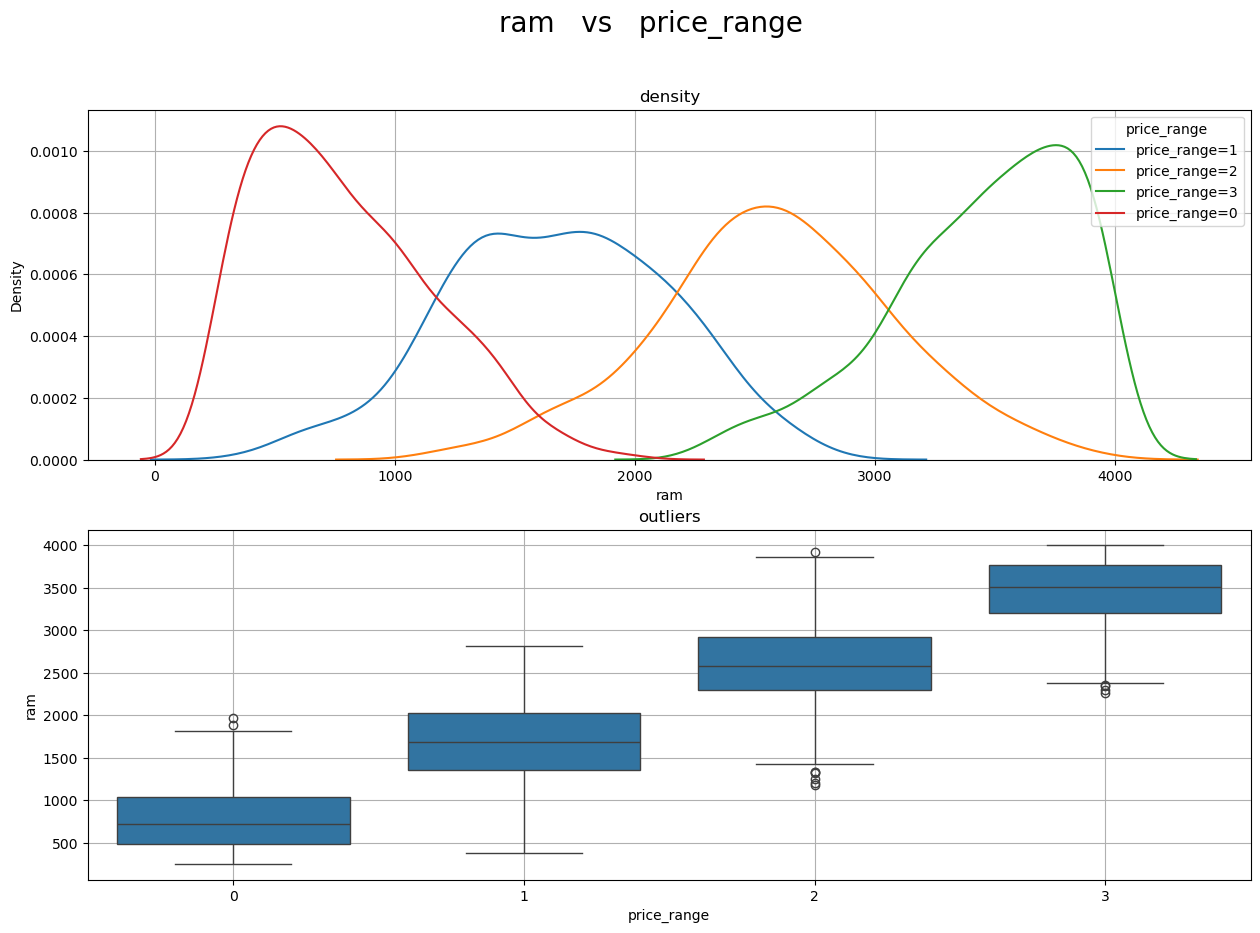

In [19]:
'''
Для того, чтобы понять, обладает ли "ram" предсказательной силой для предсказания "price_range",
построим график плотности распределений и усиковую диаграмму "ram" для каждого уникального "price_range".
'''

cat, num = "price_range", "ram"  # задаем категориальную и числовую переменные
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15, 10))  # создаем область для двух подграфиков
fig.suptitle(num + "   vs   " + cat, fontsize=20)  # заголовок

### Распределение
ax[0].title.set_text('density')  # устанавливаем заголовок
for i in df[cat].unique():  # перебираем уникальные значения в категории
    sns.kdeplot(df[df[cat] == i][num], label=f"{cat}={i}", ax=ax[0])  # график плотности для каждой категории
ax[0].grid(True)  # добавляем сетку
ax[0].legend(title=cat)  # добавляем легенду

### Усиковая диаграмма (boxplot)
ax[1].title.set_text('outliers')  # устанавливаем заголовок
sns.boxplot(x=cat, y=num, data=df, ax=ax[1])  # усиковая диаграмма по категориям
ax[1].grid(True)  # добавляем сетку

### Отрисовываем
plt.show()


In [21]:
'''
Подготовим структуру словаря из фрейма данных со столбцами
(в твоем случае, все данные количественные, без категориальных)
'''

def prep(df):
    emdf = df.dropna(axis=0, how='any', inplace=False)  # Удаляем строки с пропущенными значениями
    return emdf

In [29]:
'''
При разделении данных на обучающие и тестовые наборы нужно соблюдать основное правило:
    строки в обучающем наборе не должны попадать в тестовый, чтобы избежать утечек информации.
    Модель обучается на обучающем наборе, и её задача — делать предсказания на данных, которые она не видела.
    Иначе она будет использовать целевые значения из обучающих данных, что приведет к переобучению.
'''

# разделение данных на обучающую и тестовую выборку, 70% - для обучения, 30% - для теста
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)

# подготавливаем данные в тренировочной и тестовой выборках одинаково
df_train_clean = prep(df_train)
df_test_clean = prep(df_test)

# вывод информации о размерах выборок и статистике
print("X_train shape:", df_train_clean.drop("price_range", axis=1).shape, "| X_test shape:", df_test_clean.drop("price_range", axis=1).shape)
print("y_train mean:", round(np.mean(df_train_clean["price_range"]), 2), "| y_test mean:", round(np.mean(df_test_clean["price_range"]), 2))
print(df_train_clean.drop("price_range", axis=1).shape[1], "features:", df_train_clean.drop("price_range", axis=1).columns.to_list())

X_train shape: (1400, 6) | X_test shape: (600, 6)
y_train mean: 1.52 | y_test mean: 1.46
6 features: ['battery_power', 'px_height', 'px_width', 'ram', 'pc', 'int_memory']


In [33]:
# смотрим размер полученной выборки трейне.. 233 столбцов, 10 строк
df_train.shape

(1400, 7)

In [51]:
# формируем вспомогательный датасет (где все нужные фичи (столбцы), и нет целевой переменной) и series с целевой переменной
test_x = df_test_clean[['battery_power', 'px_height', 'px_width', 'ram', 'pc', 'int_memory']]
test_y = df_test_clean['price_range']
train_x = df_test_clean[['battery_power', 'px_height', 'px_width', 'ram', 'pc', 'int_memory']]
train_y = df_test_clean['price_range']

In [43]:
from sklearn import preprocessing

# нормируем значения
Y = 'price_range'  # Целевая переменная

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))  # Приведем числовые переменные к диапазону от 0 до 1
X = scaler.fit_transform(df_train.drop(columns=[Y]))  # Преобразуем данные, исключая целевую переменную

'''
X_train - это все признаки с атрибутами,
y_train - это метка каждого экземпляра.
'''

train_x_scaled = pd.DataFrame(X, columns=df_train.drop(columns=[Y]).columns, index=df_train.index)
train_y_scaled = df_train[Y]

train_x_scaled.head()  # выводим


,battery_power,px_height,px_width,ram,pc,int_memory
1965,0.105544,0.097486,0.104806,0.190005,0.30,0.016129
351,0.705411,0.567984,0.628838,0.650454,1.00,0.000000
1213,0.451570,0.484864,0.949933,0.435863,0.35,0.145161
1263,0.159653,0.479733,0.431909,0.226884,0.55,0.161290
230,0.659319,0.783992,0.765688,0.747728,0.30,0.596774


In [45]:
'''
Смотрим, что лежит в X, который результат нормировки train_x
'''
X

array([[0.10554442, 0.09748589, 0.10480641, 0.19000534, 0.3       ,
        0.01612903],
       [0.70541082, 0.56798358, 0.62883845, 0.6504543 , 1.        ,
        0.        ],
       [0.45156981, 0.48486403, 0.94993324, 0.43586317, 0.35      ,
        0.14516129],
       ...,
       [0.97862391, 0.61416111, 0.99265688, 0.24826296, 0.9       ,
        0.61290323],
       [0.55577822, 0.20215495, 0.53471295, 0.85141635, 0.25      ,
        0.91935484],
       [0.01937208, 0.41970241, 0.39385848, 0.26002138, 0.1       ,
        0.61290323]])

In [53]:
'''
смотрим какие индексы (по-сути номера объектов в основном датасете) остались в трейне
'''
train_x.index


Index([1523, 1724,  714,  317,  379,  169,  604, 1592,  978, 1389,
       ...
         55, 1673, 1188, 1023, 1704,  961,  709,  513, 1053,  204],
      dtype='int64', length=600)

In [55]:
'''
Метод fit(data) используется для вычисления среднего значения и стандартного отклонения для данной функции, которые будут использоваться в дальнейшем для масштабирования.
Метод transform(data) используется для выполнения масштабирования с использованием среднего значения и стандартного отклонения, рассчитанного с использованием метода .fit().
Метод fit_transform() выполняет как подгонку, так и преобразование.
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
scaled_x_train - фрейм данных с именами объектов,
scaled_x_test.values - значения, без имен объектов
 '''
X = scaler.fit_transform(test_x)

test_x_scaled = pd.DataFrame(X, columns=test_x.columns,index=test_x.index )
test_y_scaled = test_y

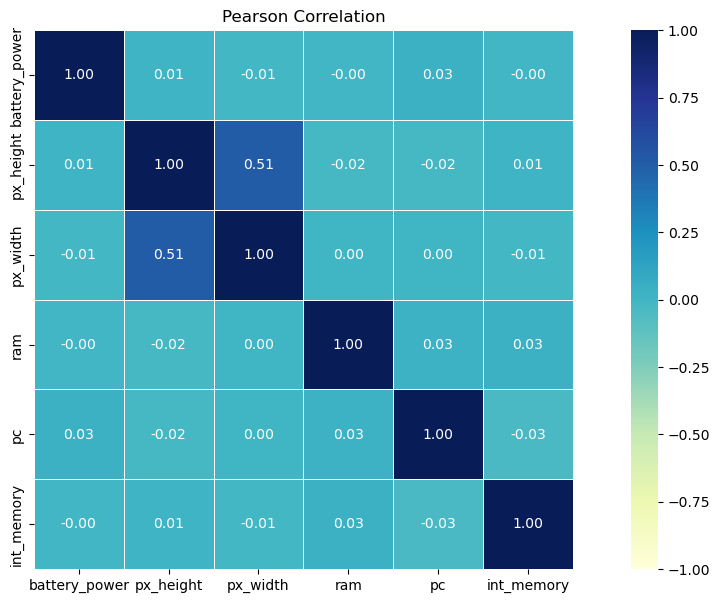

In [57]:
# Формируем матрицу корреляции для числовых данных, исключая целевую переменную
corr_matrix = (df.drop("price_range", axis=1)).copy()  # Убираем целевую переменную 'price_range'
plt.figure(figsize=(15,7), dpi=100)

# Если есть категориальные переменные, их необходимо преобразовать в числовые
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":  # Если тип данных столбца объект (категориальный)
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]  # Преобразуем в числовой формат

# Вычисляем корреляционную матрицу для всех числовых данных
corr_matrix = corr_matrix.corr(method="pearson", numeric_only=True)

# Визуализируем корреляционную матрицу с помощью heatmap
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("Pearson Correlation")
plt.show()


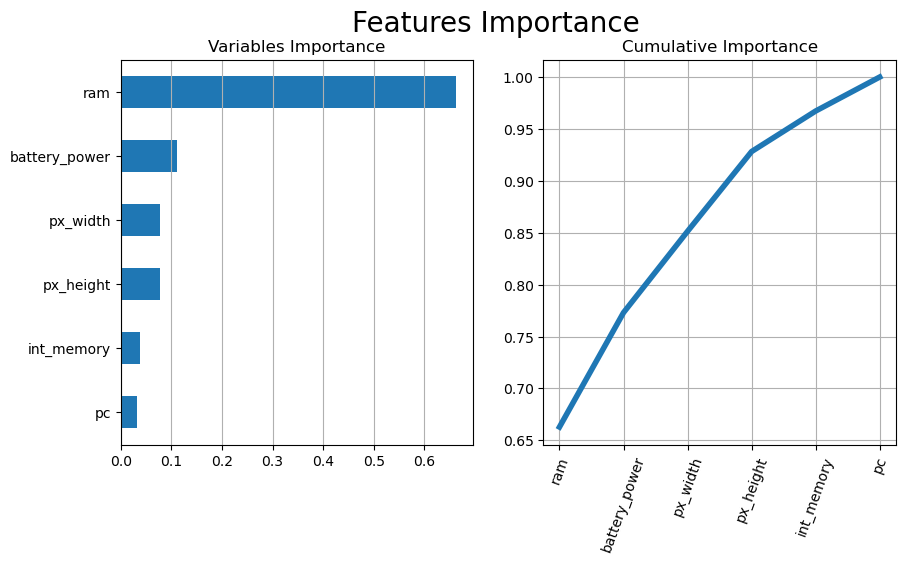

In [59]:
# Оцениваем важность каждой фичи с помощью RandomForestClassifier
X = train_x_scaled.values  # Преобразованные данные для обучения
y = train_y_scaled.values  # Целевая переменная
feature_names = train_x_scaled.columns.tolist()  # Имена столбцов (фич)

# Инициализируем модель RandomForestClassifier
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)

# Обучаем модель
model.fit(X, y)

# Получаем важность фич
importances = model.feature_importances_

# Создаем DataFrame для отображения важности фич
dtf_importances = pd.DataFrame({"IMPORTANCE": importances,
                                "VARIABLE": feature_names}).sort_values("IMPORTANCE", ascending=False)

# Добавляем накопленную сумму важности
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

## Plot
'''
 Формируем надписи для графика

 ticks : подобный массиву, содержащий список местоположений xtick. Передача пустого списка удаляет все xticks. (По желанию)
labels : подобный массиву, содержащий метки для размещения в заданных местах тиков. Этот аргумент может быть передан только в том случае, если также переданы тики. (По желанию)
kwargs : текстовые свойства, которые можно использовать для управления внешним видом меток.
Функция Matplotlib xticks() возвращает:
locs: список местоположений xtick.
labels: список текстовых объектов xlabel
plt.grid - Настройка линий сетки.
axis - Ось, к которой применяются изменения.


'''

# Построение графиков
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10, 5), dpi=100)
fig.suptitle("Features Importance", fontsize=20)

# График важности переменных
ax[0].title.set_text('Variables Importance')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")

# График накопленной суммы важности
ax[1].title.set_text('Cumulative Importance')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)

# Настройка отображения меток
plt.xticks(rotation=70)
plt.grid(axis='both')

# Отображаем графики
plt.show()


In [61]:
# Проектирование, обучение, тестирование и оценка модели машинного обучения:

# Используем только выбранные параметры для обучения модели
X_train = train_x_scaled[['battery_power', 'px_height', 'px_width', 'ram']]
y_train = train_y_scaled

X_test = test_x_scaled[['battery_power', 'px_height', 'px_width', 'ram']]
y_test = test_y_scaled



In [63]:
# Будем использовать GradientBoostingClassifier - градиентный бустинг. Он строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются деревья решений. Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную. Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.
# Оценивать качество предсказаний будем по RandomizedSearchCV

## call model
model = ensemble.GradientBoostingClassifier()

## define hyperparameters combinations to try
param_dic = {
    'learning_rate': [0.15, 0.1, 0.05],  # весовой коэффициент для поправок по новым деревьям при добавлении в модель
    'n_estimators': [100, 250, 500],  # количество деревьев, добавленных в модель
    'max_depth': [2, 3, 4, 5],  # максимальная глубина дерева
    'min_samples_split': [2, 4, 6],  # задает минимальное количество выборок для разделения
    'min_samples_leaf': [1, 3, 5],  # минимальное количество выборок для формирования листа
    'max_features': [2, 3, 4],  # квадратный корень из функций обычно является хорошей отправной точкой
    'subsample': [0.7, 0.8, 0.9, 1]  # образцы, которые будут использоваться для подгонки индивидуального базового файла
}

## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)

print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)

model = random_search.best_estimator_  # здесь теперь хранятся параметры, при которых были получены наилучшие метрики на трейне


Best Model parameters: {'subsample': 0.7, 'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 2, 'learning_rate': 0.15}
Best Model mean accuracy: 0.9178571428571429


In [65]:
# X_train - это тренировочный датасет
# y_train - это целевая переменная для каждого объекта в X_train.

## train
## заполняем модель данным из трейновых датасетов
model.fit(X_train, y_train)

## test
predicted_prob = model.predict_proba(X_test)  # прогнозирование
'''
Функция predict() принимает только один аргумент, который представляет собой test датасет.
'''
predicted = model.predict(X_test).astype('int32')

'''
Смотрим, что получили
А получили мы для каждого объекта - вектор вероятностей отнесения этого объекта к классам price_range
'''
predicted_prob


array([[9.99170257e-01, 8.10442755e-04, 1.89872584e-05, 3.13460876e-07],
       [8.35784469e-05, 1.09633674e-01, 8.90101197e-01, 1.81550937e-04],
       [2.88437004e-07, 3.47454825e-06, 7.32126708e-02, 9.26783566e-01],
       ...,
       [3.06448937e-05, 8.14378856e-01, 1.85291263e-01, 2.99236429e-04],
       [5.30949639e-08, 3.80826909e-06, 2.14701740e-03, 9.97849121e-01],
       [5.94084522e-06, 9.00377189e-04, 9.61999364e-01, 3.70943176e-02]])

In [67]:
# а это истинное значение, кто к какому классу относится
y_test.astype('int32')  # astype - позволяет преобразовывать тип данных существующего столбца данных в набор данных


1523    0
1724    2
714     3
317     0
379     3
       ..
961     3
709     0
513     1
1053    3
204     2
Name: price_range, Length: 600, dtype: int32

In [69]:
## Accuracy и AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''

accuracy = metrics.accuracy_score(y_test, predicted)  # Оценим точность классификации.

# AUC (Area Under the Curve) — оценка качества классификации
auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class='ovo', average="weighted")  # Возвращаем долю правильно классифицированных выборок.
print("Accuracy (overall correct predictions):", round(accuracy, 2))
print("AUC:", round(auc, 2))

'''
Получим результат
'''

## Precision и Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")  # Оценка полноты (Recall)
precision = metrics.precision_score(y_test, predicted, average="weighted")  # Оценка точности (Precision)
print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))

# Печатаем детальный отчет о классификации
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.9
AUC: 0.99
Recall (all 1s predicted right): 0.9
Precision (confidence when predicting a 1): 0.9
Detail:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       162
           1       0.85      0.86      0.86       151
           2       0.88      0.84      0.86       137
           3       0.93      0.98      0.95       150

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



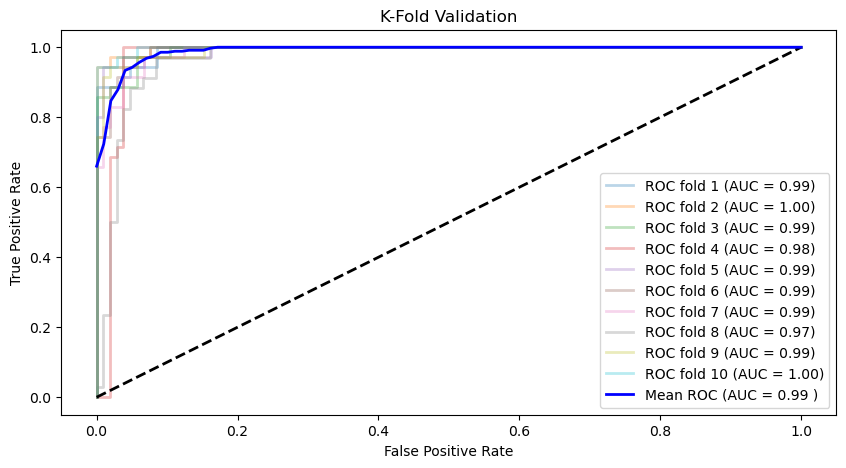

In [71]:
# Строим ROC кривые
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(10, 5), dpi=100)
i = 1

for train, test in cv.split(X_train, y_train):
    '''
    iloc - позволяет получить определенное значение, принадлежащее к строке и столбцу,
    используя указанные значения индекса.
    X_train - это весь экземпляр с атрибутами,
    y_train - это метка каждого экземпляра.
    train_selected_test - разделяет массивы/матрицы на случайные тестовые подмножества.
    '''
    X_train_selected = X_train.iloc[train]
    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    # Предсказания модели
    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)

    # Вычисление ROC кривой
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))  # Интерполяция для сглаживания кривой
    roc_auc = metrics.auc(fpr, tpr)  # Площадь под ROC кривой
    aucs.append(roc_auc)
    
    # Отображение каждой fold ROC кривой
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i + 1

# Построим итоговую среднюю ROC кривую
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)  # Среднее значение TPR по всем folds
mean_auc = metrics.auc(mean_fpr, mean_tpr)  # Средняя AUC по всем folds

# Построим график
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()


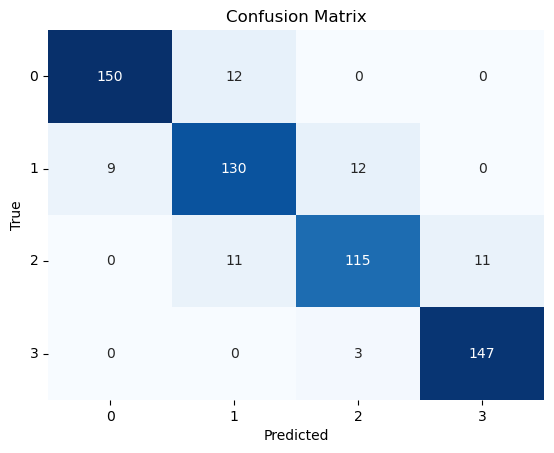

In [73]:
# Confusion matrix (Мультиклассовый)
# Получаем уникальные классы из целевой переменной
classes = np.unique(y_test)

# Создаем фигуру и оси для графика
fig, ax = plt.subplots()

# Строим матрицу ошибок
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)

# Визуализируем матрицу ошибок в виде тепловой карты
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)

# Устанавливаем подписи для осей и заголовок
ax.set(xlabel="Predicted", ylabel="True", title="Confusion Matrix")

# Устанавливаем метки классов на оси Y
ax.set_yticklabels(labels=classes, rotation=0)

# Показываем график
plt.show()


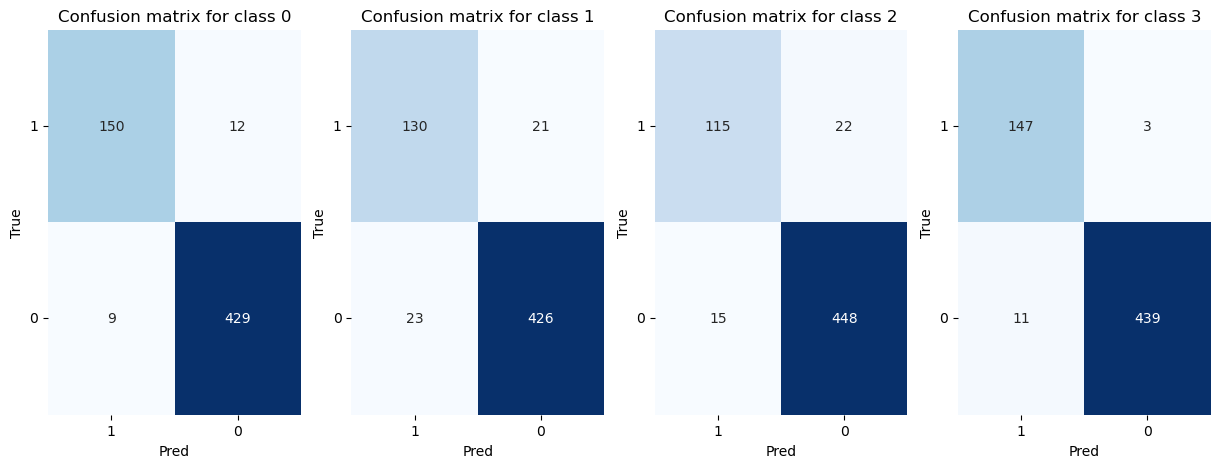

In [75]:
# Вспомогательная функция для построения confusion matrix для каждого класса
def compute_class(ls_res, class_value): 
    # Преобразуем результат в int и создаем бинарный вектор для каждого класса
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c == class_value else 0)
    return y_t_class

# Confusion matrix (для каждого класса по отдельности)
# Получаем уникальные классы из y_test
classes = np.unique(y_test).astype(int)

# Лейблы классов для матрицы
lbs = [1, 0]  # Учитываем два класса (например, 0 и 1)

'''
plt.subplots()это функция, которая возвращает кортеж, содержащий фигуру и объект(ы) осей.
plt.subplots() возвращает кортеж с двумя элементами.
1-й должен быть объектом фигуры, а 2й должен быть группой объектов второстепенных сюжетов.

При использовании fig, ax = plt.subplots()вы распаковываете этот кортеж в переменные figи ,ax.

Наличие fig полезно, если вы хотите изменить атрибуты уровня фигуры или сохранить фигуру как файл изображения позже
(например, с помощью fig.savefig('yourfilename.png')).
plt.grid - Настройка линий сетки.

'''

# Создаем фигуру и оси для графиков
fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(15, 5), dpi=100)

# Строим матрицы ошибок для каждого класса
for class_i in classes:
    # Получаем бинарную метку для текущего класса
    y_one_class = compute_class(y_test, class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()), class_i)
    
    # Строим confusion matrix для текущего класса
    cm = metrics.confusion_matrix(y_one_class, predicted_one_class, labels=lbs)
    
    # Строим тепловую карту для текущего класса
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax[class_i])
    
    # Устанавливаем подписи для осей и заголовок
    ax[class_i].set(xlabel="Pred", ylabel="True", title=f"Confusion matrix for class {class_i}")
    ax[class_i].set_xticklabels(labels=lbs, rotation=0)
    ax[class_i].set_yticklabels(labels=lbs, rotation=0)

# Отображаем все графики
plt.show()


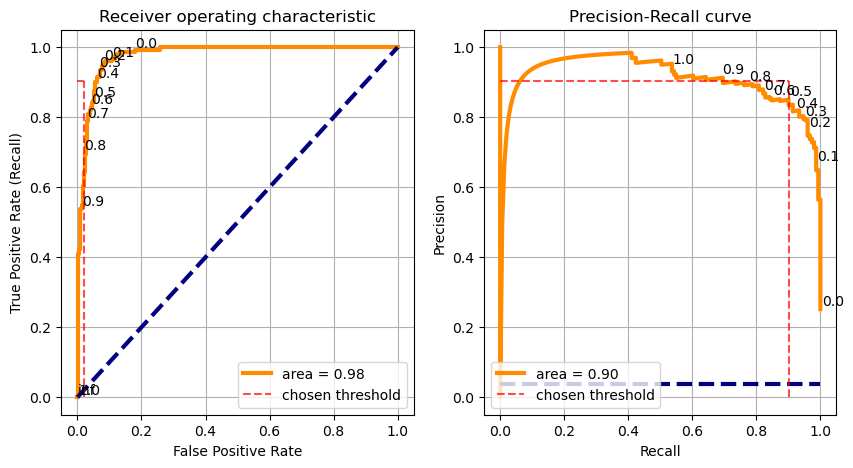

In [77]:
# Еще ROC кривые
classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=100)

# plot ROC curve
# Строим ROC кривую для тестовых данных
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1 - cm[0, 0] / (cm[0, 0] + cm[0, 1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1 - cm[0, 0] / (cm[0, 0] + cm[0, 1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

# annotate ROC thresholds
# Находим пороговые значения ROC и отображаем их на графике
thres_in_plot = []
for i, t in enumerate(thresholds):
    t = np.round(t, 1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i], tpr[i]), xytext=(fpr[i], tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)

# plot P-R curve
# Строим Precision-Recall кривую
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob[:, 1], pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0, 1], [(cm[1, 0] + cm[1, 0]) / len(y_test), (cm[1, 0] + cm[1, 0]) / len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)

# annotate P-R thresholds
# Находим пороговые значения P-R и отображаем их на графике
thres_in_plot = []
for i, t in enumerate(thresholds):
    t = np.round(t, 1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t, 1), xy=(recalls[i], precisions[i]),
                    xytext=(recalls[i], precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)

# Отображаем графики
plt.show()


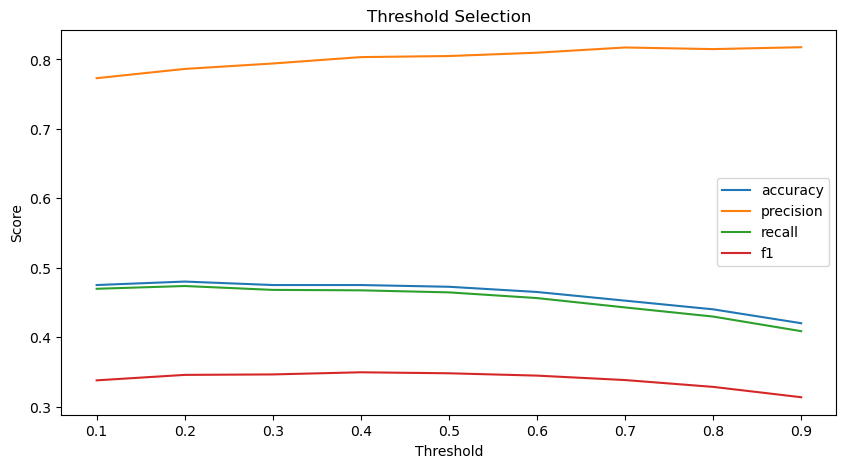

In [79]:
## calculate scores for different thresholds
'''
Определим, какие значения отсечки лучше всего для нашей модели.
Для этого построим график ("значение отсечки", "значение метрики") для каждой метрики accuracy, precision, recall, f1
'''
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=100)

dic_scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(
    df[['battery_power', 'px_height', 'px_width', 'ram']], df['price_range'], test_size=0.2
)

# Прогнозируем вероятности для тестовой выборки
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:, 1]  # берем вероятности для положительного класса
thresholds = []

for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)  # классификация на основе порога
    thresholds.append(threshold)
    
    # Вычисление метрик для каждого порога
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))

'''
Добавим линии
'''
# Строим DataFrame для удобства
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))

# Построение графика
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)

# Отображаем график
plt.show()
